In [1]:
import h5py
import numpy as np
import glob
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

/cluster/work/bewi/members/tuncel/anaconda3/envs/r-3.4.1-env/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
loc_values = [0.25, 0.5, 0.75, 1, 1.25, 1.5, 2, 2.5, 3]

In [3]:
loc_values

[0.25, 0.5, 0.75, 1, 1.25, 1.5, 2, 2.5, 3]

In [4]:
path_to_sim = '../simulated/9_groups/'
def evaluate_once(loc_value):
    loom_file_path =  path_to_sim+'melanomaS2_sim_loc'+str(loc_value)+'.h5'
    hier_dim_red_results_path = sorted(glob.glob(path_to_sim+'analysis/*/clusters/hierarchical_melanomaS2_sim_loc'+str(loc_value)+'.csv'))
    kmeans_dim_red_results_path = sorted(glob.glob(path_to_sim+'analysis/*/clusters/kmeans_melanomaS2_sim_loc'+str(loc_value)+'.csv'))
    cluster_results_path = sorted(glob.glob(path_to_sim+'analysis/*/clusters/melanomaS2_sim_loc'+str(loc_value)+'.csv'))
    h5f = h5py.File(loom_file_path, 'r')
    cell_groups = h5f['cell_attrs']['cell_groups'].value
    h5f.close()
    vfunc1 = np.vectorize(lambda t: t.decode('UTF-8'))
    cell_groups = vfunc1(cell_groups)
    vfunc2 = np.vectorize(lambda t: int(t[-1:]))
    cell_groups = vfunc2(cell_groups)
    results_path = hier_dim_red_results_path + kmeans_dim_red_results_path + cluster_results_path
    # cluster results
    cluster_results = []
    for c in results_path:
        c_res = pd.read_csv(c, header=None)
        cluster_results.append(c_res[c_res.columns[-1]].values)   
    results = []
    i = 0
    for cr in cluster_results:
        #print (results_path[i])
        #print ('nmi')
        i = i + 1
        #print(normalized_mutual_info_score(cell_groups, cr))
        results.append(normalized_mutual_info_score(cell_groups, cr))
    vfunc2 = np.vectorize(lambda t: t.split('/')[4]+ '+' + t.split('/')[6].split('_')[0])
    index_list = vfunc2(results_path)
    #print(index_list)
    return pd.Series(results, index=index_list)

### Testing of local csvs

In [5]:
index = evaluate_once(2).T.index.values
df = pd.DataFrame(columns=index)
for loc in loc_values:
    df.loc[loc] = evaluate_once(loc)
    #df.append(evaluate_once(loc),ignore_index=True)

In [6]:
df = df.rename(index=str, columns={"griph+melanomaS2": "griph", "phenograph+melanomaS2": "phenograph", "simlr+melanomaS2": "simlr",})

In [7]:
df

,block_zifa+hierarchical,factor_analysis+hierarchical,pca+hierarchical,tsne+hierarchical,block_zifa+kmeans,factor_analysis+kmeans,pca+kmeans,tsne+kmeans,griph,phenograph,simlr
0.25,0.017145,0.018027,0.017764,0.018802,0.016544,0.024144,0.015772,0.009380,0.006637,0.017914,0.010471
0.5,0.154291,0.020931,0.078459,0.013827,0.156588,0.022193,0.067381,0.015911,0.021288,0.070855,0.019704
0.75,0.261837,0.023570,0.357815,0.237900,0.261361,0.023570,0.425581,0.273056,0.047036,0.491857,0.168857
1.0,0.536066,0.019068,0.569739,0.545114,0.550574,0.015005,0.585126,0.585732,0.166211,0.767274,0.577435
1.25,0.665009,0.020725,0.754681,0.839580,0.663448,0.613162,0.684675,0.821221,0.419792,0.901582,0.859593
1.5,0.700841,0.859138,0.876489,0.962647,0.719246,0.836442,0.827039,0.958223,0.665143,0.942254,0.965177
2.0,0.769155,0.957030,0.926846,0.998682,0.781287,0.963955,0.903994,0.998682,0.875423,0.988793,0.982750
2.5,0.681566,0.994525,0.930853,1.000000,0.720679,0.997465,0.919809,1.000000,0.949909,1.000000,0.981359
3.0,0.731649,0.988500,0.967107,1.000000,0.735296,0.999300,0.963195,1.000000,0.977517,1.000000,0.987258


This simulation assumes uniform variance among all of the simulated groups.


In [25]:
df.index.values.astype(float)

array([0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 2.  , 2.5 , 3.  ])

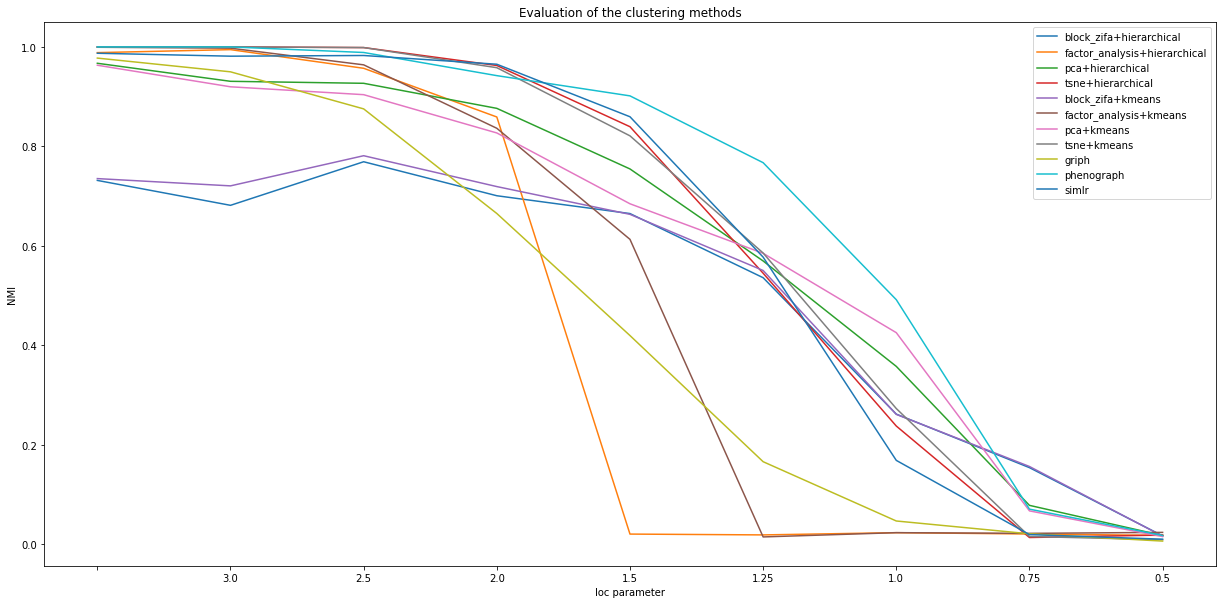

In [26]:
ax = df.plot(title='Evaluation of the clustering methods',figsize=(21,10))
ax.set_xlabel('loc parameter')
ax.set_xticklabels(df.index.values.astype(float))
ax.set_ylabel('NMI')
ax.invert_xaxis()

## Performance Comparison
Parses the statistics json file

In [9]:
import json
stats = None
with open('../simulated/23-02-2018/stats.json') as json_data:
    stats = json.load(json_data)
rules_runtime = stats['rules']
df_dict = pd.DataFrame(rules_runtime)
df_dict = df_dict.drop(columns=['all'], axis=1)

In [10]:
df_dict

,factor_analysis,griph,pca,phenograph,silhouette_hierarchical,silhouette_kmeans,simlr,tsne,zifa
max-runtime,4.754215,39.071136,7.221478,6.229139,13.460599,16.748804,66.865615,155.131993,1006.930979
mean-runtime,4.286418,34.972114,4.828604,4.141275,9.676970,10.555967,59.235242,112.076184,895.520182
min-runtime,3.887013,30.566954,3.395144,3.354956,6.263963,6.655851,50.874035,75.254758,682.796982


In [11]:
dfc_dict = pd.DataFrame()

In [12]:
dfc_dict['block_zifa+hierarchical'] = df_dict['zifa']+df_dict['silhouette_hierarchical']
dfc_dict['factor_analysis+hierarchical'] = df_dict['factor_analysis']+df_dict['silhouette_hierarchical']
dfc_dict['pca+hierarchical'] = df_dict['pca']+df_dict['silhouette_hierarchical']
dfc_dict['tsne+hierarchical'] = df_dict['tsne']+df_dict['silhouette_hierarchical']

dfc_dict['block_zifa+kmeans'] = df_dict['zifa']+df_dict['silhouette_kmeans']
dfc_dict['factor_analysis+kmeans'] = df_dict['factor_analysis']+df_dict['silhouette_kmeans']
dfc_dict['pca+kmeans'] = df_dict['pca']+df_dict['silhouette_kmeans']
dfc_dict['tsne+kmeans'] = df_dict['tsne']+df_dict['silhouette_kmeans']

dfc_dict['griph'] = df_dict['griph']
dfc_dict['phenograph'] = df_dict['phenograph']
dfc_dict['simlr'] = df_dict['simlr']

In [13]:



dfc_dict['factor_analysis+hierarchical'] = df_dict['zifa']+df_dict['silhouette_hierarchical']
dfc_dict['factor_analysis+hierarchical'] = df_dict['zifa']+df_dict['silhouette_hierarchical']
dfc_dict['factor_analysis+hierarchical'] = df_dict['zifa']+df_dict['silhouette_hierarchical']


In [14]:
dfc_dict

,block_zifa+hierarchical,factor_analysis+hierarchical,pca+hierarchical,tsne+hierarchical,block_zifa+kmeans,factor_analysis+kmeans,pca+kmeans,tsne+kmeans,griph,phenograph,simlr
max-runtime,1020.391577,1020.391577,20.682077,168.592592,1023.679782,21.503019,23.970282,171.880796,39.071136,6.229139,66.865615
mean-runtime,905.197152,905.197152,14.505574,121.753154,906.076149,14.842385,15.384571,122.632151,34.972114,4.141275,59.235242
min-runtime,689.060945,689.060945,9.659107,81.518721,689.452833,10.542864,10.050995,81.910609,30.566954,3.354956,50.874035


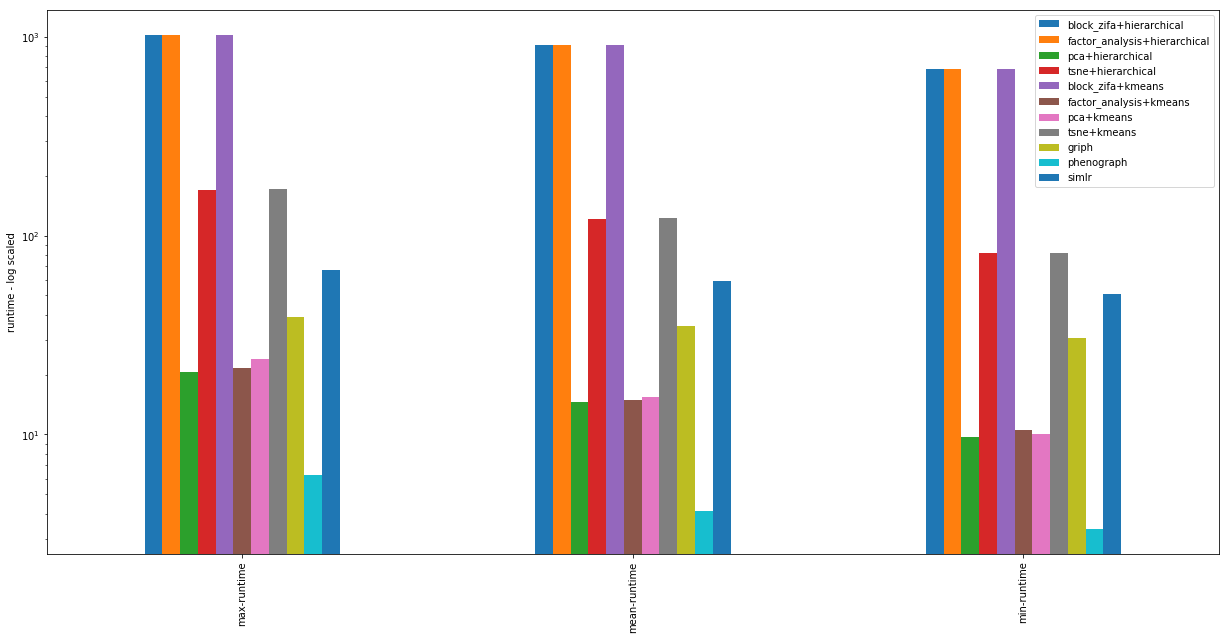

In [15]:
ax = dfc_dict.plot(kind='bar',figsize=(21,10), logy=True)
ax.set_ylabel('runtime - log scaled')